### Plot Transformers with Matplotlib

In [1]:
import os
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#### Add fonts (demo)

In [2]:
print(plt.rcParams["font.family"])
print(plt.rcParams["font.sans-serif"])
print(plt.rcParams["font.serif"])

['sans-serif']
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']


In [3]:
# Add temporary font
from matplotlib import font_manager

folder = r"fonts"

fname = r"roboto/Roboto-Regular.ttf"
fpath = f"{folder}/{fname}".replace('\\', os.path.sep)
font_manager.fontManager.addfont(fpath)

fname = r"Open_Sans/OpenSans-VariableFont_wdth,wght.ttf"
fpath = f"{folder}/{fname}".replace('\\', os.path.sep)
font_manager.fontManager.addfont(fpath)

# Test
for font in font_manager.fontManager.ttflist[-2:]:
    print(font.name, '-', font.fname)   # font name and file path


Roboto - fonts/roboto/Roboto-Regular.ttf
Open Sans - fonts/Open_Sans/OpenSans-VariableFont_wdth,wght.ttf


#### Functions

In [4]:
# Functions

def add_line(
    ax,
    head_position,              # head point
    tail_position,              # tail point
    *,
    connectionstyle=None,       # connection line type: None (`straightline`), or `angle`
    angle1=0,                   # effective when it's an angle
    angle2=90,
    rad=6,                      # rounding radius of the edge
    arrowstyle='->',            # arrow style
    head_width=0.15,
    head_length=0.4,
    linewidth=1,
    color='black',
    shrink1=0,
    shrink2=0,
    zorder=10,
):
    """
    Create links in Transformer blocks
    """

    if connectionstyle:
        if connectionstyle != 'angle':
            print(
                "Warning: Currently it only supports `angle`;"
                "\n         Other connectionstyles are untested!"
            )
        connection_style = f"{connectionstyle},angleA={angle1},angleB={angle2},rad={rad}"
    else:
        connection_style = None
    
    if '>' in arrowstyle or '<' in arrowstyle:
        arrow_style = f"{arrowstyle}, head_width={head_width}, head_length={head_length}"
    else:
        arrow_style = f"{arrowstyle}"
    ax.annotate(
        "",
        xy=tail_position, 
        xytext=head_position, 
        zorder=zorder,
        arrowprops=dict(
            connectionstyle=connection_style,
            arrowstyle=arrow_style, 
            linewidth=linewidth,
            color=color,
            shrinkA=shrink1, shrinkB=shrink2,
            patchA=None, patchB=None,
            # mutation_scale=10,
            # capstyle='butt',
        ),
    )

In [5]:
def add_box(
    ax,
    position,   # lower left corner of the box
    width=10,
    height=10,
    *,
    rounding_size=1,
    pad=0,
    linewidth=1,
    facecolor='#F3F3F4',
    edgecolor='black',
    zorder=0,
    alpha=1.0,
    # 
    text=None,
    text_color='#393939',
    text_ha='center',
    text_va='center',
    # font_family='sans-serif',
    fontsize=8,
):
    """
    Create box/rectangle with text when necessary
    """
    
    x, y =position
    box = mpatches.FancyBboxPatch(
        xy=(x, y),
        width=width, 
        height=height,
        boxstyle=mpatches.BoxStyle("Round", pad=pad, rounding_size=rounding_size),
        linewidth=linewidth,
        facecolor=facecolor,
        edgecolor=edgecolor,
        zorder=zorder,
        alpha=alpha,
    )
    ax.add_artist(box)
    
    # Add text when necessary
    if text:
        x = x + width/2
        y = y + height/2
        ax.text(
            x, y,
            text,
            ha=text_ha,
            va=text_va,
            color=text_color,
            size=fontsize,
            # family=font_family,
            zorder=zorder,
        )

    

In [6]:
def add_circle(
    ax,
    position,   # center of the circle
    radius,     # radius of the circle
    *,
    linewidth=1,
    facecolor='white',
    edgecolor='black',
    zorder=30,
    # 
    text=None,  # text if any
    text_color='#393939',
    # font_family='sans-serif',
    text_ha='center',
    text_va='center',
    fontsize=8,
):
    """
    Create circle and add text when necessary
    """
    
    circle = mpatches.Circle(
        xy=position, 
        radius=radius,
        facecolor=facecolor,
        edgecolor=edgecolor,
        linewidth=linewidth,
        zorder=zorder,
    )
    ax.add_artist(circle)
    
    # Add text when necessary
    if text:
        x, y = position
        ax.text(
            x, y,
            text,
            ha=text_ha,
            va=text_va,
            color=text_color,
            size=fontsize,
            # family=font_family,
            zorder=zorder,
        )



def add_arc(
    ax,
    position,   # center of the arc
    width,      # width of the arc
    height,     # height of the arc
    *,
    theta1=0,
    theta2=180,
    linewidth=1,
    color='black',
    zorder=30,
):
    """
    Create arc
    """
    arc = mpatches.Arc(
        xy=position, 
        width=width, 
        height=height, 
        theta1=theta1,
        theta2=theta2,
        linewidth=linewidth,
        color=color,
        zorder=zorder,
    )
    ax.add_artist(arc)
    

#### Main

##### Parameters

See the figure below for coordinate specification:

<img src="figures/transformer_with_gridlines.png" alt="Annotated coordinates" />



In [7]:

# =============================
# Important parameters
# =============================
# zorders
encoder_zorder = 0
line_zorder = 10
attn_zorder = 20
text_zorder = 30

# Colors
encoder_color = "#F3F3F4"
attn_color = '#FAE3C0'
norm_color = '#F2F4C6'
feedforward_color = '#C9E7F5'
linear_color = '#DCDFEE'
embedding_color = '#F7E1E1'
softmax_color = '#D1E6D1'
text_color = '#393939'

# Set font
# font_family = 'sans-serif'
font_family = 'Roboto'
font_family = 'Open Sans'
plt.rcParams["font.family"] = font_family

# Coordinates and sizes setting
line_width = 1
rounding_size = 1
font_size = 8

encoder_left_x, encoder_lower_y = (10, 40)     # lower left corner of the encoder block
decoder_width = encoder_width = 35

attn_width, attn_height = 22, 9     # width and height of `Multi-Head Attention`/`Feed Forward` block
masked_attn_width, masked_attn_height = attn_width, attn_height*1.3     # width and height of `Masked Multi-Head Attention` block
norm_width, norm_height = attn_width, attn_height/2     # width and height of `Add & Norm`/`Linear`/`Softmax` block
embedding_width, embedding_height = attn_width, attn_height # width and height of `Input/Output Embedding` block
pe_radius = 3               # Radius of `Positional Encoding` block
add_circle_radius = 1.5     # Radius of add circle (Circle+), i.e., the add of `Input/Output Embedding` and `Positional Encoding`

# delta-x and delta-y in x and y axes
dx1 = 3         # shifted x-distance of the main/central vertical line in encoder/decoder (to draw residual connections)
dx2 = 2.5*dx1   # x-distance between Q/K/V projection arrows
dx3 = 2.25*dx2  # x-distance between the main/central vertical line and residual connections
dx4 = 3*dx1     # x-distance between Positinal Encoding and the Embedding (denoted as circle+)
dx5 = 1.5*dx1   # x-distance between encoder and decoder blocks

# dy in encoder side
dy1 = 7         # Input/Output arrow length
dy2 = 5         # y-distance between Embedding and lower bound of add circle (Circle+)
dy3 = 2*add_circle_radius   # height of add circle (Circle+)
dy4 = 6         # y-distance between upper bound of add circle (Circle+) and lower bound of encoder
dy5 = 9         # y-distance between lower bound of encoder block and `Multi-Head Attention`
dy6 = 2         # y-distance between lower bound of encoder block and Residual connection in `Multi-Head Attention`
dy7 = 5         # y-distance between lower bound of encoder block and Q/K/V in `Multi-Head Attention`
dy8 = 2         # y-distance between `Multi-Head Attention` and `Add & Norm`
dy9 = 8         # y-distance between `Add & Norm` and `Feed Forward`
dy10 = 3        # y-distance between `Add & Norm` and upper bound of encoder block
dy11 = 3        # y-distance between upper bound of encoder block and cross-attention line

# dy in decoder side (only need to specify special cases that are different from the encoder side)
dy12 = 5        # y-distance between `Add & Norm` and `Feed Forward`
dy13 = 4        # y-distance between `Add & Norm` and `Feed Forward`
dy14 = 5        # y-distance between `Linear` and `Softmax`

# Get encoder and decoder height
encoder_height = dy5 + attn_height + dy8 + norm_height + dy9 + attn_height + dy8 + norm_height + dy10
decoder_height = dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8 + norm_height + dy12 + attn_height + dy8 + norm_height + dy10

# Get the position of decoder
decoder_left_x = encoder_left_x + encoder_width + dx5   # lower left corner of the decoder block
decoder_lower_y = encoder_lower_y                       # lower left corner of the decoder block

# Get the most import central line of encoder and decoder
encoder_central_x = encoder_left_x + encoder_width/2 + dx1  # x-axis of the central vertical line of encoder
decoder_central_x = decoder_left_x + decoder_width/2 - dx1  # x-axis of the central vertical line of decoder



##### Plot
Note: The appearance of the rendered figure may vary depending on the system or file format used. For example, curved lines may render differently in .pdf files compared to .png files. If discrepancies are observed, consider adjusting the rounding radius or other relevant parameters to achieve the desired output.

For example, consider to change parameter `rad` in funcation `add_line` from `6` to `12` or other values that work.

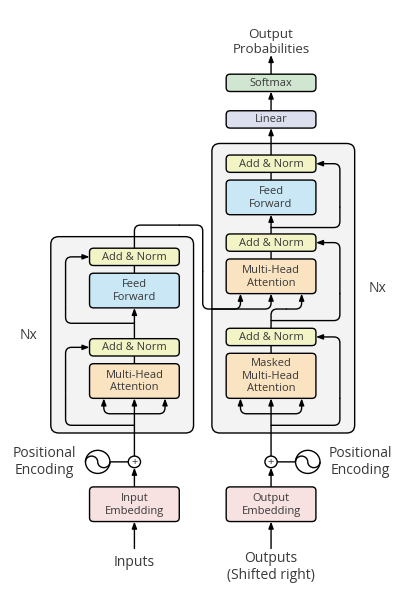

In [8]:
fig, ax = plt.subplots(
    figsize=(5, 7.5),
    # frameon=False,
)


# =============================
# 1. Encoder block
# =============================

# main
add_box(
    ax, 
    (encoder_left_x, encoder_lower_y), 
    width=encoder_width,
    height=encoder_height,
    rounding_size=rounding_size*2,
    linewidth=line_width,
    zorder=encoder_zorder,
)

# add text
x = encoder_left_x - attn_width/4
y = encoder_lower_y + encoder_height/2
ax.text(
    x, y,
    "Nx",
    ha='center',
    va='center',
    color=text_color,
    size=font_size*1.25,
    # family=font_family,
    zorder=text_zorder,
)

# -----------------------------
# Encoder: Multi-Head Attention
# -----------------------------
x = encoder_central_x - attn_width/2
y = encoder_lower_y + dy5
add_box(
    ax, 
    (x,y), 
    width=attn_width,
    height=attn_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=attn_color,
    text="Multi-Head\nAttention",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Encoder: Add & Norm 1
# -----------------------------
x = encoder_central_x - norm_width/2
y = encoder_lower_y + dy5 + attn_height + dy8
add_box(
    ax, 
    (x,y), 
    width=norm_width,
    height=norm_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=norm_color,
    text="Add & Norm",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Line: Multi-Head Attention -> Add & Norm 1
# -----------------------------
head = (encoder_central_x, encoder_lower_y + dy5 + attn_height)
tail = (encoder_central_x, encoder_lower_y + dy5 + attn_height + dy8)
add_line(ax, head, tail, arrowstyle='-')


# -----------------------------
# Line: Embedding -> Multi-Head Attention
# -----------------------------
head = (encoder_central_x, encoder_lower_y - dy4)
tail = (encoder_central_x, encoder_lower_y + dy5)
add_line(ax, head, tail, arrowstyle='-|>')

# -----------------------------
# Line: Multi-Head Attention Q/K/V
# -----------------------------
head = (encoder_central_x, encoder_lower_y + dy7)
tail = (encoder_central_x - dx2, encoder_lower_y + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-|>')

head = (encoder_central_x, encoder_lower_y + dy7)
tail = (encoder_central_x + dx2, encoder_lower_y + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-|>')

# -----------------------------
# Line: Multi-Head Attention residual connection
# -----------------------------
head = (encoder_central_x, encoder_lower_y + dy6)
tail = (encoder_central_x - dx3, encoder_lower_y + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-')

head = (encoder_central_x - dx3, encoder_lower_y + dy5)
tail = (encoder_central_x - norm_width/2, encoder_lower_y + dy5 + attn_height + dy8 + norm_height/2)
add_line(
    ax, head, tail, connectionstyle='angle', arrowstyle='-|>', 
    angle1=90, angle2=0,
)

# -----------------------------
# Line: Add & Norm 1 -> Feed Forward
# -----------------------------
head = (encoder_central_x, encoder_lower_y + dy5 + attn_height + dy8 + norm_height)
tail = (encoder_central_x, encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9)
add_line(ax, head, tail, arrowstyle='-|>')

# -----------------------------
# Encoder: Feed Forward
# -----------------------------
x = encoder_central_x - attn_width/2
y = encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9
add_box(
    ax, 
    (x,y), 
    width=attn_width,
    height=attn_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=feedforward_color,
    text="Feed\nForward",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Encoder: Add & Norm 2
# -----------------------------
x = encoder_central_x - norm_width/2
y = encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9 + attn_height + dy8
add_box(
    ax, 
    (x,y), 
    width=norm_width,
    height=norm_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=norm_color,
    text="Add & Norm",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Line: Feed Forward -> Add & Norm 2
# -----------------------------
head = (encoder_central_x, encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9 + attn_height)
tail = (encoder_central_x, encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9 + attn_height + dy8)
add_line(ax, head, tail, arrowstyle='-')

# -----------------------------
# Line: Feed Forward residual connection
# -----------------------------
head = (encoder_central_x, encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9/2)
tail = (encoder_central_x - dx3, encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-')

head = (encoder_central_x - dx3, encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9)
tail = (encoder_central_x - norm_width/2, encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9 + attn_height + dy8 + norm_height/2)
add_line(
    ax, head, tail, connectionstyle='angle', arrowstyle='-|>', 
    angle1=90, angle2=0,
)

# -----------------------------
# Line: Cross Attention: Encoder -> Decoder
# -----------------------------
head = (encoder_central_x, encoder_lower_y + dy5 + attn_height + dy8 + norm_height + dy9 + attn_height + dy8 + norm_height)
tail = (encoder_central_x + attn_width/2, encoder_lower_y + encoder_height + dy11)
add_line(
    ax, head, tail, connectionstyle='angle', arrowstyle='-', 
    angle1=90, angle2=0,
)

head = (encoder_central_x + attn_width/2, encoder_lower_y + encoder_height + dy11)
tail = (decoder_left_x - dx5/2 , encoder_lower_y + encoder_height - attn_height)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-')

head = (decoder_left_x - dx5/2 , encoder_lower_y + encoder_height - attn_height)
tail = (decoder_left_x , decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy7)
add_line(
    ax, head, tail, connectionstyle='angle', arrowstyle='-',
    angle1=90, angle2=0,
)



# =============================
# 2. Decoder block
# =============================

# main
add_box(
    ax, 
    (decoder_left_x, decoder_lower_y), 
    width=decoder_width,
    height=decoder_height,
    rounding_size=rounding_size*2,
    linewidth=line_width,
    zorder=encoder_zorder,
)

# add text
x = decoder_left_x + decoder_width + attn_width/4
y = decoder_lower_y + decoder_height/2
ax.text(
    x, y,
    "Nx",
    ha='center',
    va='center',
    color=text_color,
    size=font_size*1.25,
    # family=font_family,
    zorder=text_zorder,
)

# -----------------------------
# Decoder: Masked Multi-Head Attention
# -----------------------------
x = decoder_central_x - masked_attn_width/2
y = decoder_lower_y + dy5
add_box(
    ax, 
    (x,y), 
    width=masked_attn_width,
    height=masked_attn_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=attn_color,
    text="Masked\nMulti-Head\nAttention",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Decoder: Add & Norm 1
# -----------------------------
x = decoder_central_x - norm_width/2
y = decoder_lower_y + dy5 + masked_attn_height + dy8
add_box(
    ax, 
    (x,y), 
    width=norm_width,
    height=norm_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=norm_color,
    text="Add & Norm",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Line: Masked Multi-Head Attention -> Add & Norm 1
# -----------------------------
head = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height)
tail = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height + dy8)
add_line(ax, head, tail, arrowstyle='-')


# -----------------------------
# Line: Embedding -> Masked Multi-Head Attention
# -----------------------------
head = (decoder_central_x, decoder_lower_y - dy4)
tail = (decoder_central_x, decoder_lower_y + dy5)
add_line(ax, head, tail, arrowstyle='-|>')

# -----------------------------
# Line: Multi-Head Attention Q/K/V
# -----------------------------
head = (decoder_central_x, decoder_lower_y + dy7)
tail = (decoder_central_x - dx2, decoder_lower_y + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-|>')

head = (decoder_central_x, decoder_lower_y + dy7)
tail = (decoder_central_x + dx2, decoder_lower_y + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-|>')

# -----------------------------
# Line: Masked Multi-Head Attention residual connection
# -----------------------------
head = (decoder_central_x, decoder_lower_y + dy6)
tail = (decoder_central_x + dx3, decoder_lower_y + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-')

head = (decoder_central_x + dx3, decoder_lower_y + dy5)
tail = (decoder_central_x + norm_width/2, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height/2)
add_line(
    ax, head, tail, connectionstyle='angle', arrowstyle='-|>', 
    angle1=90, angle2=0,
)


# -----------------------------
# Decoder: Multi-Head Attention
# -----------------------------
x = decoder_central_x - attn_width/2
y = decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5
add_box(
    ax, 
    (x,y), 
    width=attn_width,
    height=attn_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=attn_color,
    text="Multi-Head\nAttention",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Decoder: Add & Norm 2
# -----------------------------
x = decoder_central_x - norm_width/2
y = decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8
add_box(
    ax, 
    (x,y), 
    width=norm_width,
    height=norm_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=norm_color,
    text="Add & Norm",
    text_color=text_color,
    zorder=attn_zorder,
)


# -----------------------------
# Line: Add & Norm 1 -> Multi-Head Attention: Q
# -----------------------------
head = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height)
tail = (decoder_central_x + dx2/2, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy7)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-', 
    angle1=90, angle2=0,
)

head = (decoder_central_x + dx2/2, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy7)
tail = (decoder_central_x + dx2, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-|>')


# -----------------------------
# Line: Cross Attention K/V: Encoder -> Decoder
# -----------------------------
# # K/V in Cross Attention: 
head = (decoder_left_x , decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy7)
tail = (decoder_central_x - dx2 , decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-|>')

head = (decoder_left_x , decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy7)
tail = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-|>')


# -----------------------------
# Line: Multi-Head Attention residual connection
# -----------------------------
head = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy6)
tail = (decoder_central_x + dx3, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-')

head = (decoder_central_x + dx3, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5)
tail = (decoder_central_x + norm_width/2, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8 + norm_height/2)
add_line(
    ax, head, tail, connectionstyle='angle', arrowstyle='-|>', 
    angle1=90, angle2=0,
)

# -----------------------------
# Line: Multi-Head Attention -> Add & Norm 2
# -----------------------------
head = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height)
tail = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8)
add_line(ax, head, tail, arrowstyle='-')

# -----------------------------
# Line: Add & Norm 2 -> Feed Forward
# -----------------------------
head = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8 + norm_height)
tail = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8 + norm_height + dy12)
add_line(ax, head, tail, arrowstyle='-|>')

# -----------------------------
# Decoder: Feed Forward
# -----------------------------
x = decoder_central_x - attn_width/2
y = decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8 + norm_height + dy12
add_box(
    ax, 
    (x,y), 
    width=attn_width,
    height=attn_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=feedforward_color,
    text="Feed\nForward",
    text_color=text_color,
    zorder=attn_zorder,
)


# -----------------------------
# Decoder: Add & Norm 3
# -----------------------------
x = decoder_central_x - norm_width/2
y = decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8 + norm_height + dy12 + attn_height + dy8
add_box(
    ax, 
    (x,y), 
    width=norm_width,
    height=norm_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=norm_color,
    text="Add & Norm",
    text_color=text_color,
    zorder=attn_zorder,
)


# -----------------------------
# Line: Feed Forward residual connection
# -----------------------------
head = (decoder_central_x, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8 + norm_height + dy12/3)
# tail = (decoder_central_x + dx3, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8 + norm_height + dy12)
tail = (decoder_central_x + dx3, decoder_lower_y + decoder_height - dy10 - norm_height - attn_height)
add_line(ax, head, tail, connectionstyle='angle', arrowstyle='-')

head = (decoder_central_x + dx3, decoder_lower_y + decoder_height - dy10 - norm_height - attn_height)
# tail = (decoder_central_x + norm_width/2, decoder_lower_y + dy5 + masked_attn_height + dy8 + norm_height + dy5 + attn_height + dy8 + norm_height + dy12 + attn_height + dy8 + norm_height/2)
tail = (decoder_central_x + norm_width/2, decoder_lower_y + decoder_height - dy10 - norm_height/2)
add_line(
    ax, head, tail, connectionstyle='angle', arrowstyle='-|>', 
    angle1=90, angle2=0,
)

# -----------------------------
# Line: Feed Forward -> Add & Norm 3
# -----------------------------
head = (decoder_central_x, decoder_lower_y + decoder_height - dy10 - norm_height - dy8)
tail = (decoder_central_x, decoder_lower_y + decoder_height - dy10 - norm_height)
add_line(ax, head, tail, arrowstyle='-')


# =============================
# Output Layers
# =============================

# -----------------------------
# Linear
# -----------------------------
x = decoder_central_x - attn_width/2
y = decoder_lower_y + decoder_height + dy13
add_box(
    ax, 
    (x,y), 
    width=norm_width,
    height=norm_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=linear_color,
    text="Linear",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Softmax
# -----------------------------
x = decoder_central_x - attn_width/2
y = decoder_lower_y + decoder_height + dy13 + norm_height + dy14
add_box(
    ax, 
    (x,y), 
    width=norm_width,
    height=norm_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=softmax_color,
    text="Softmax",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Line: Add & Norm 3 -> Linear
# -----------------------------
head = (decoder_central_x, decoder_lower_y + decoder_height - dy10)
tail = (decoder_central_x, decoder_lower_y + decoder_height + dy13)
add_line(ax, head, tail, arrowstyle='-|>')

# -----------------------------
# Line: Linear -> Softmax
# -----------------------------
head = (decoder_central_x, decoder_lower_y + decoder_height + dy13 + norm_height)
tail = (decoder_central_x, decoder_lower_y + decoder_height + dy13 + norm_height + dy14)
add_line(ax, head, tail, arrowstyle='-|>')

# -----------------------------
# Line: Linear -> Softmax
# -----------------------------
head = (decoder_central_x, decoder_lower_y + decoder_height + dy13 + norm_height + dy14 + norm_height)
tail = (decoder_central_x, decoder_lower_y + decoder_height + dy13 + norm_height + dy14 + norm_height + dy14)
add_line(ax, head, tail, arrowstyle='-|>')

# -----------------------------
# Add text for Output
# -----------------------------
x = decoder_central_x - attn_width/2
y = decoder_lower_y + decoder_height + dy13 + norm_height + dy14 + norm_height + dy14
add_box(
    ax, 
    (x,y), 
    width=attn_width,
    height=attn_height/1.25,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor='None',
    edgecolor='None',
    text="Output\nProbabilities",
    text_color=text_color,
    fontsize=font_size*1.2,
    zorder=attn_zorder,
)



# =============================
# Input Embedding
# =============================

x = encoder_central_x - attn_width/2
y = encoder_lower_y - dy2 - dy3 - dy4 - attn_height
add_box(
    ax, 
    (x,y), 
    width=attn_width,
    height=attn_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=embedding_color,
    text="Input\nEmbedding",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Positional Encoding
# -----------------------------

# circle1
x = encoder_central_x - dx4
y = encoder_lower_y - dy4 - dy3/2
add_circle(
    ax,
    (x, y),
    radius=pe_radius,
)

# sine symbol
# arc1: 0-180
x = encoder_central_x - dx4 - pe_radius/2
y = encoder_lower_y - dy4 - dy3/2
add_arc(
    ax,
    (x, y),
    width=pe_radius,
    height=pe_radius,
    theta1=0,
    theta2=180,
)

# arc2: 180-360
x = encoder_central_x - dx4 + pe_radius/2
y = encoder_lower_y - dy4 - dy3/2
add_arc(
    ax,
    (x, y),
    width=pe_radius,
    height=pe_radius,
    theta1=180,
    theta2=360,
)

# add text
x = encoder_central_x - attn_width
y = encoder_lower_y - dy4 - dy3/2
ax.text(
    x, y,
    "Positional\nEncoding",
    ha='center',
    va='center',
    color=text_color,
    size=font_size*1.25,
    # family=font_family,
    zorder=text_zorder,
)


# circle2: circle+
x = encoder_central_x
y = encoder_lower_y - dy4 - dy3/2
add_circle(
    ax,
    (x, y),
    radius=dy3/2,
    text='+',
)

# line: circle+ -> Pesitional Encoding
head = (encoder_central_x - dy3/2, encoder_lower_y - dy4 - dy3/2)
tail = (encoder_central_x - dx4 + pe_radius, encoder_lower_y - dy4 - dy3/2)
add_line(ax, head, tail, arrowstyle='-')


# line: Input Embedding -> circle+
head = (encoder_central_x, encoder_lower_y - dy4 - dy3 - dy2)
tail = (encoder_central_x, encoder_lower_y - dy4 - dy3)
add_line(ax, head, tail, arrowstyle='-|>')


# line: Inputs -> Input Embedding
head = (encoder_central_x, encoder_lower_y - dy4 - dy3 - dy2 - embedding_height - dy1)
tail = (encoder_central_x, encoder_lower_y - dy4 - dy3 - dy2 - embedding_height)
add_line(ax, head, tail, arrowstyle='-|>')


# add text
x = encoder_central_x - attn_width/2
y = encoder_lower_y - dy4 - dy3 - dy2 - embedding_height - dy1 - embedding_height/1.25
add_box(
    ax, 
    (x,y),      # lower-left corner of the text box
    width=attn_width,
    height=attn_height/1.25,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor='None',
    edgecolor='None',
    text="Inputs",
    text_color=text_color,
    fontsize=font_size*1.25,
    zorder=attn_zorder,
)



# =============================
# Ouput Embedding
# =============================

x = decoder_central_x - attn_width/2
y = decoder_lower_y - dy2 - dy3 - dy4 - attn_height
add_box(
    ax, 
    (x,y), 
    width=attn_width,
    height=attn_height,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor=embedding_color,
    text="Output\nEmbedding",
    text_color=text_color,
    zorder=attn_zorder,
)

# -----------------------------
# Positional Encoding
# -----------------------------

# circle1
x = decoder_central_x + dx4
y = decoder_lower_y - dy4 - dy3/2
add_circle(
    ax,
    (x, y),
    radius=pe_radius,
)


# sine symbol
# arc1: 0-180
x = decoder_central_x + dx4 - pe_radius/2
y = decoder_lower_y - dy4 - dy3/2
add_arc(
    ax,
    (x, y),
    width=pe_radius,
    height=pe_radius,
    theta1=0,
    theta2=180,
)
# arc2: 180-360
x = decoder_central_x + dx4 + pe_radius/2
y = decoder_lower_y - dy4 - dy3/2
add_arc(
    ax,
    (x, y),
    width=pe_radius,
    height=pe_radius,
    theta1=180,
    theta2=360,
)

# add text
x = decoder_central_x + attn_width
y = decoder_lower_y - dy4 - dy3/2
ax.text(
    x, y,
    "Positional\nEncoding",
    ha='center',
    va='center',
    color=text_color,
    size=font_size*1.25,
    # family=font_family,
    zorder=text_zorder,
)


# circle2: circle+
x = decoder_central_x
y = encoder_lower_y - dy4 - dy3/2
add_circle(
    ax,
    (x, y),
    radius=dy3/2,
    text='+',
)


# line: circle+ -> Pesitional Encoding
head = (decoder_central_x + dy3/2, decoder_lower_y - dy4 - dy3/2)
tail = (decoder_central_x + dx4 - pe_radius, decoder_lower_y - dy4 - dy3/2)
add_line(ax, head, tail, arrowstyle='-')


# line: Ouput Embedding -> circle+
head = (decoder_central_x, encoder_lower_y - dy4 - dy3 - dy2)
tail = (decoder_central_x, encoder_lower_y - dy4 - dy3)
add_line(ax, head, tail, arrowstyle='-|>')


# line: Outputs -> Output Embedding
head = (decoder_central_x, decoder_lower_y - dy4 - dy3 - dy2 - embedding_height - dy1)
tail = (decoder_central_x, decoder_lower_y - dy4 - dy3 - dy2 - embedding_height)
add_line(ax, head, tail, arrowstyle='-|>')


# add text
x = decoder_central_x - attn_width/2
y = decoder_lower_y - dy4 - dy3 - dy2 - embedding_height - dy1 - embedding_height/1.1
add_box(
    ax, 
    (x,y),      # lower-left corner of the text box
    width=attn_width,
    height=attn_height/1.25,
    rounding_size=rounding_size,
    linewidth=line_width,
    facecolor='None',
    edgecolor='None',
    text="Outputs\n(Shifted right)",
    text_color=text_color,
    fontsize=font_size*1.25,
    zorder=attn_zorder,
)


# -----------------------------
# Set x/y limit and save
# -----------------------------

# ax.set_xlim(0, 100)
ax.set_xlim(0, 95)
ax.set_ylim(0, 150)

# remove axis (the borderline)
ax.set_axis_off()    # turn this on for debug

# plt.tight_layout(pad=0.1)

# Note: The appearance of the rendered figure may vary depending on the system or file format used. 
# For example, curved lines may render differently in .pdf files compared to .png files. 
# If discrepancies are observed, consider adjusting the rounding radius or 
# other relevant parameters to achieve the desired output.

# out_dir = 'figures'
# os.makedirs(out_dir, exist_ok=True)
# plt.savefig(
#     os.path.join(out_dir, 'Transformer.pdf'), 
#     bbox_inches='tight',
# )
# plt.savefig(
#     os.path.join(out_dir, 'Transformer.png'), 
#     # transparent=True,
#     bbox_inches='tight', dpi=300
# )
